In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

## Exercise 1

In [2]:
A = np.random.rand(6, 4)

def SVD(A, tol=.001):
    '''
    This function takes a matrix A and computes the SVD
    A = U_1@σ_1@V_1H with σ_1 the nonzero singular values and
    U_1, V_1 orthonormal
    '''
    m, n = A.shape[0], A.shape[1]
    # Grab eigenvalues/vectors (vectors are columns of V)
    λ, V = la.eig(A.conj().T @ A)[0], la.eig(A.conj().T @ A)[1]
    σ = np.sqrt(λ)
    # Get index for sorted σ, V
    index = (-σ).argsort()
    # Sort
    σ = σ[index]
    V = V[:,[index]]
    #Drop zeros
    r = len(σ[σ > tol])
    σ_1 = σ[:r]
    V_1 = V[:,:r].reshape(n, r)
    U_1 = A @ V_1 / σ_1
    V_1H = V_1.conj().T 
    return U_1, σ_1, V_1H

## Exercise 2

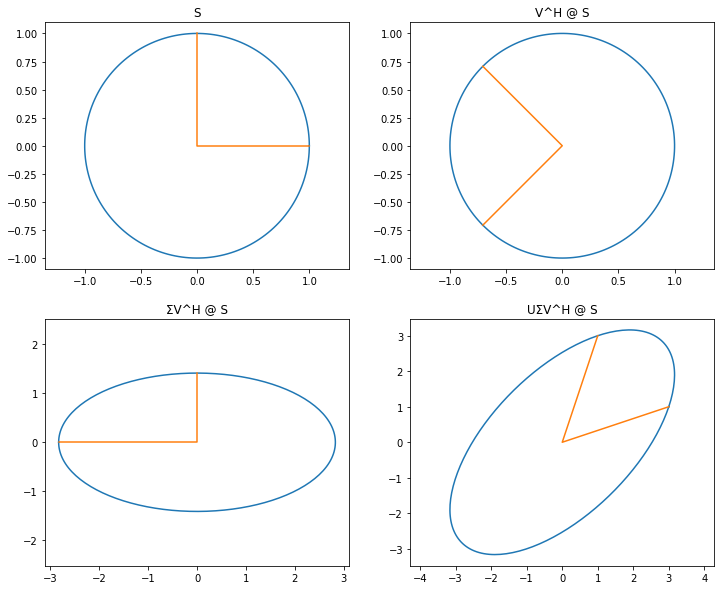

In [3]:
def svd_visualize(A):
    '''
    Function takes a 2x2 matrix A and produces a visualization of 
    its SVD
    '''
    # Initialize grid on unit circle
    theta = np.linspace(0, 2*np.pi, 200)
    x = np.cos(theta)
    y = np.sin(theta)
    S = np.vstack((x, y))
    # Define E matrix
    E = np.array([[1, 0, 0], [0, 0, 1]])
    U, Σ, VH = la.svd(A)[0], np.diag(la.svd(A)[1]), la.svd(A)[2]
    fig, ax = plt.subplots(2, 2, figsize = (12, 10))
    ax[0,0].plot(S[0,:], S[1,:])
    ax[0,0].plot(E[0,:], E[1,:])
    ax[0,0].axis("equal")
    ax[0,0].set_title('S')

    VH, S, VH@S
    ax[0,1].plot((VH @ S)[0,:], (VH @ S)[1,:])
    ax[0,1].plot((VH @ E)[0,:], (VH @ E)[1,:])
    ax[0,1].axis("equal")
    ax[0,1].set_title('V^H @ S')

    ax[1,0].plot((Σ * VH @ S)[0,:], (Σ * VH @ S)[1,:])
    ax[1,0].plot((Σ * VH @ E)[0,:], (Σ * VH @ E)[1,:])
    ax[1,0].axis("equal")
    ax[1,0].set_title('ΣV^H @ S')

    ax[1,1].plot((U @ (Σ @ VH @ S))[0,:], (U @ (Σ @ VH @ S))[1,:])
    ax[1,1].plot((U @ (Σ @ VH @ E))[0,:], (U @ (Σ @ VH @ E))[1,:])
    ax[1,1].axis("equal")
    ax[1,1].set_title('UΣV^H @ S')
    plt.show()
    
A = np.array([[3,1], [1,3]])
svd_visualize(A)

In [51]:
A = np.random.random((50, 50))
s = 5

def approxs(A, s):
    if s > np.linalg.matrix_rank(A):
        raise ValueError('parameter s > rank A')
    else:
        U, σ, VH = la.svd(A)[0], la.svd(A)[1], la.svd(A)[2]
        σ = σ[:s]
        Σ = np.diag(σ)
        U = U[:,:s]
        VH = VH[:s,:]
        A_s = U @ (Σ @ VH)
        entries = np.sqrt(Σ.size) + U.size+VH.size
    return(A_s, entries)


np.linalg.matrix_rank(approxs(A, 5)[0])

5

## Exercise 4

In [11]:
def approxerror(A, ϵ):
    U, σ, VH = la.svd(A)[0], la.svd(A)[1], la.svd(A)[2]
    sorig = len(σ)
    σ = σ[σ > ϵ]
    s = len(σ)
    print("s =", s)
    return approxs(A, s)
    
    '''
    if sorig == s:
        raise ValueError('Error is less than smallest sing. value: \
        A cannot be approximated within this tolerance.')
    Σ = np.diag(σ)
    U = U[:,:s]
    VH = VH[:s,:]
    A_s = U @ Σ @ VH
    entries = np.sqrt(Σ.size) + U.size+VH.size
    print("s =", s)
    return A_s, s, entries
    '''

A = np.random.random((500, 500))
print(np.linalg.matrix_rank(approxerror(A, 1)[0]))
print(la.norm(A-approxerror(A, 1)[0]))
#This is actually broken, and the error is much too high...

s = 452
452
452
s = 452
452
3.9348240368150087


## Exercise 5

GRAYSCALE


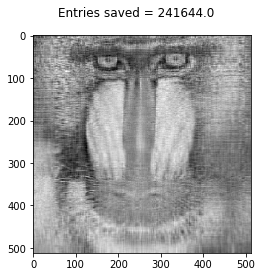

COLOR


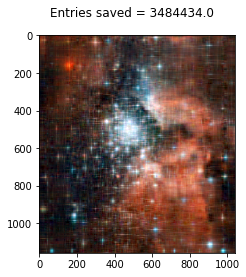

In [86]:
image_gray = plt.imread('Data/baboon.png')
image_color = plt.imread('Data/hubble.jpg')

def imcompress(filename, s):
    '''
    Function takes image file and integer s, computes best rank-s
    approximation of image file. Has ability to radically compress
    image files.
    '''
    # Read in image
    image = plt.imread(filename)
    # GRAYSCALE IMAGES
    if len(image.shape) == 2:
        print("GRAYSCALE")
        image_s = approxs(image, s)[0]
        entries = approxs(image, s)[1]
        saved = image.size - entries
        plt.imshow(image_s, cmap = "gray")
        plt.suptitle(f"Entries saved = {saved}")
        plt.show()
    elif len(image.shape) == 3:
        print("COLOR")
        rlayer = image[:,:,0]/255
        blayer = image[:,:,1]/255
        glayer = image[:,:,2]/255
        
        rlayer_s = approxs(rlayer, s)[0]
        blayer_s = approxs(blayer, s)[0]
        glayer_s = approxs(glayer, s)[0]
        
        #trim low-rank approximations to within [0,1]
        rlayer_s[rlayer_s>1] = 1
        blayer_s[blayer_s>1] = 1
        glayer_s[glayer_s>1] = 1
        rlayer_s[rlayer_s<0] = 0
        blayer_s[blayer_s<0] = 0
        glayer_s[glayer_s<0] = 0
        
        #Paste the layers back together
        image_s = np.dstack((rlayer_s, blayer_s, glayer_s))
        entries = approxs(rlayer, s)[1]*3
        saved = image.size - entries
        
        #Plot
        plt.imshow(image_s)
        plt.suptitle(f"Entries saved = {saved}")
        plt.show()
    
    else:
        raise ValueError("Something's wrong with the way your image is being stored")

#The baboon is just a grayscale image to test on
imcompress('Data/baboon.png', 20)
imcompress('Data/hubble.jpg', 20)